In [6]:
from typing import Callable, Tuple
import matplotlib.pylab as plt
import seaborn as sns

import numpy as np
import pandas as pd

from simulated_annealing.algorithm import simple_simulated_annealing
from simulated_annealing.cont_neighbors import gaussian_perturbation, uniform_perturbation
from simulated_annealing.experiment_utils import shape_progress

REPS = 50
SEEDS = np.random.randint(200, size=REPS)

# Experiments

In [7]:
def f(x: np.ndarray) -> float:
    assert len(x) == 2
    x1, x2 = x
    return x1 ** 2 + x2 ** 2 + 25 * (np.sin(x1) ** 2 + np.sin(x2) ** 2)


bounds = [(-5, 5), (-5, 5)]


def gaussian_generator():
    def nbr(x: np.ndarray) -> np.ndarray:
        return gaussian_perturbation(x, bounds)

    return nbr


def uniform_generator():
    def nbr(x: np.ndarray) -> np.ndarray:
        return uniform_perturbation(x, bounds)

    return nbr


def experiment(nbr_generator: Callable[[], Callable[[np.ndarray], np.ndarray]],
               name: str,
               initial_temp,
               max_iters=200,
               seeds=SEEDS,
               temp_factor=0.95) -> pd.DataFrame:
    results = []
    nbr = nbr_generator()

    for i in range(REPS):
        np.random.seed(seeds[i])
        s0 = np.random.uniform(-5, 5, size=2)
        results.append(
            simple_simulated_annealing(f, nbr, s0,
                                       initial_temperature=initial_temp,
                                       max_iterations=max_iters,
                                       temp_factor=temp_factor)
        )

    df = pd.concat([shape_progress(res, i) for i, res in enumerate(results)])
    df["Type"] = name
    df["$T_0$"] = str(initial_temp)
    return df


def plot(df: pd.DataFrame, optimal: float) -> Tuple[plt.Figure, Tuple]:
    plot_figure, (a1, a2, a3) = plt.subplots(3, 1, figsize=(10, 15))
    sns.lineplot(df, x="Iteration", y="Acceptance rate", hue="$T_0$", errorbar="sd", ax=a1)
    a2.axhline(optimal, color="black")
    sns.lineplot(df, x="Iteration", y="Current cost", style="Type", hue="$T_0$", errorbar="sd", ax=a2)
    a3.axhline(optimal, color="black")
    sns.lineplot(df, x="Iteration", y="Best cost", style="Type", hue="$T_0$", errorbar="sd", ax=a3)

    return plot_figure, (a1, a2, a3)


def plot_wo_err(df: pd.DataFrame, optimal: float) -> Tuple[plt.Figure, Tuple]:
    plot_figure, ax = plt.subplots(1, 1, figsize=(10, 5))
    ax.axhline(optimal, color="black")
    sns.lineplot(df, x="Iteration", y="Best cost", style="Type", hue="$T_0$", errorbar=None, ax=ax)

    return plot_figure, ax

In [8]:
%%time
exp_results = [
    experiment(gaussian_generator, "Gaussian", initial_temp=1000),
    experiment(uniform_generator, "Uniform", initial_temp=1000),
    experiment(gaussian_generator, "Gaussian", initial_temp=100),
    experiment(uniform_generator, "Uniform", initial_temp=100),
    experiment(gaussian_generator, "Gaussian", initial_temp=50),
    experiment(uniform_generator, "Uniform", initial_temp=50),
    experiment(gaussian_generator, "Gaussian", initial_temp=10),
    experiment(uniform_generator, "Uniform", initial_temp=10),
    experiment(gaussian_generator, "Gaussian", initial_temp=1),
    experiment(uniform_generator, "Uniform", initial_temp=1),
]
full_df = pd.concat(exp_results)
full_df.to_csv("results/cont_sa.csv")

CPU times: user 4.65 s, sys: 116 ms, total: 4.76 s
Wall time: 4.7 s


/Users/nawat/Library/Caches/pypoetry/virtualenvs/code-_T3AfWX0-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nawat/Library/Caches/pypoetry/virtualenvs/code-_T3AfWX0-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nawat/Library/Caches/pypoetry/virtualenvs/code-_T3AfWX0-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nawat/Library/Caches/pypoetry/virtualenvs/code-_T3AfWX0-p

CPU times: user 6.01 s, sys: 64.1 ms, total: 6.07 s
Wall time: 5 s


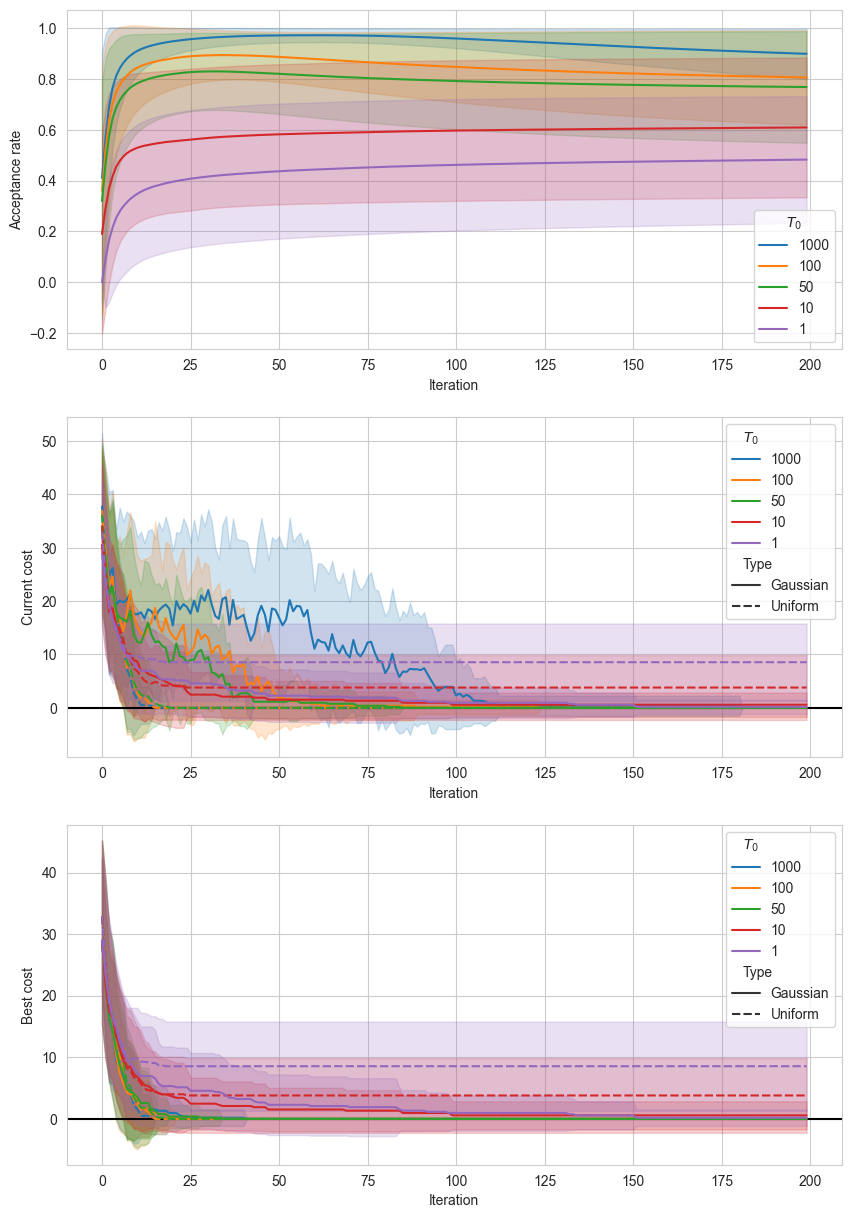

In [9]:
%%time
fig, _ = plot(full_df, 0)
fig.savefig("../images/cont_sa.png", dpi=600, bbox_inches="tight")

/Users/nawat/Library/Caches/pypoetry/virtualenvs/code-_T3AfWX0-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nawat/Library/Caches/pypoetry/virtualenvs/code-_T3AfWX0-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nawat/Library/Caches/pypoetry/virtualenvs/code-_T3AfWX0-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nawat/Library/Caches/pypoetry/virtualenvs/code-_T3AfWX0-p

CPU times: user 2.23 s, sys: 24.4 ms, total: 2.26 s
Wall time: 1.67 s


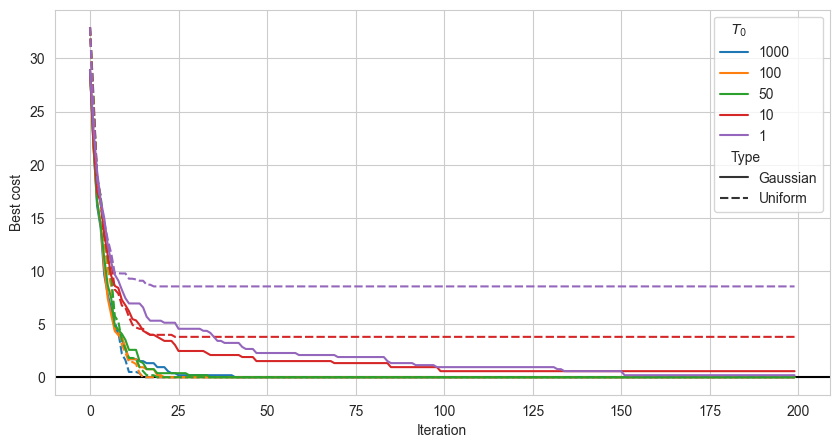

In [10]:
%%time
fig, _ = plot_wo_err(full_df, 0)
fig.savefig("../images/cont_sa_noerr.png", dpi=600, bbox_inches="tight")